In [2]:
from cosmiclib import Compressor, Optimizer
import plotly.express as px
import pandas as pd
import numpy as np

In [124]:
def make_row(Qtot, sol_dict):
    dict_data = {'Qtot': [Qtot]}
    dict_data.update({f'{c}: q': [sol_dict['compressors'][c]['q']] for c in comp_names})
    dict_data.update({f'{c}: w': [sol_dict['compressors'][c]['w']] for c in comp_names})
    return pd.DataFrame(dict_data)

compressor1 = Compressor('Compressor 1', qmin=0.5, qmax=1, wmin=0.5, wmax=1)
compressor2 = Compressor('Compressor 2', qmin=0.5, qmax=0.75, wmin=0.75, wmax=7/8)
compressors = [compressor1, compressor2]
Qmax = sum([c.qmax for c in compressors])
comp_names = [c.name for c in compressors]
my_optimizer = Optimizer(compressors=compressors)
my_optimizer.setup_problem()

df = None
Qmax_plot = Qmax * 1.1
for Qtot in np.arange(0,Qmax_plot,0.001):
    solution = my_optimizer.find_opt(Qtot)
    if df is None:
        df = make_row(Qtot, solution)
    else:
        df = pd.concat([df, make_row(Qtot, solution)])
#df.set_index('Qtot')


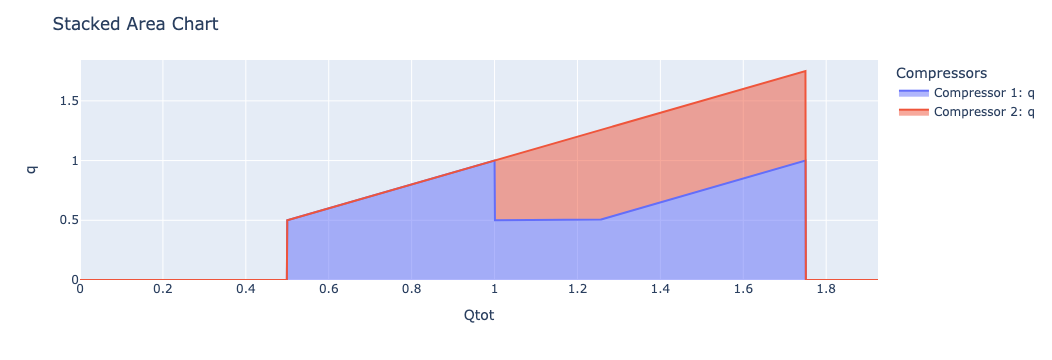

In [125]:
import plotly.express as px
import pandas as pd

dg = df[['Qtot', 'Compressor 1: q', 'Compressor 2: q']]
# Melt the DataFrame to create a long-form dataset
df_melted = dg.melt(id_vars=['Qtot'], var_name='Compressors', value_name='Value')

# Create a stacked area chart
fig = px.area(df_melted, x='Qtot', y='Value', color='Compressors', line_group='Compressors', hover_name='Compressors')

# Customize the chart layout
fig.update_layout(title='Stacked Area Chart', xaxis_title='Qtot', yaxis_title='q')

# Display the chart
fig.show()

In [123]:
Qmax

1.75

In [112]:
df[['Qtot', 'Compressor 1: q', 'Compressor 2: q']]

,Qtot,Compressor 1: q,Compressor 2: q
0,0.0,0.00,0.00
0,0.1,NaN,NaN
0,0.2,NaN,NaN
0,0.3,NaN,NaN
0,0.4,NaN,NaN
0,0.5,0.50,0.00
0,0.6,0.60,0.00
0,0.7,0.70,0.00
0,0.8,0.80,0.00
0,0.9,0.90,0.00


In [98]:
df_melted

,Year,Category,Value
0,2015,A,3
1,2016,A,6
2,2017,A,8
3,2018,A,9
4,2019,A,11
5,2020,A,12
6,2015,B,5
7,2016,B,7
8,2017,B,6
9,2018,B,10


In [104]:
import pandas as pd

# Generate some sample data
df = pd.DataFrame({'Year': [2015, 2016, 2017, 2018, 2019, 2020],
                   'A': [3, 6, 8, 9, 11, 12],
                   'B': [5, 7, 6, 10, 12, 13],
                   'C': [4, 6, 7, 8, 9, 11]})

# Melt the DataFrame and retain 'Year' and 'A' and 'B' as values per observation
df_melted = df.melt(id_vars=['Year'], value_vars=['A', 'B'], var_name='Variable', value_name='Value')

# Print the melted DataFrame
print(df_melted)

    Year Variable  Value
0   2015        A      3
1   2016        A      6
2   2017        A      8
3   2018        A      9
4   2019        A     11
5   2020        A     12
6   2015        B      5
7   2016        B      7
8   2017        B      6
9   2018        B     10
10  2019        B     12
11  2020        B     13
